Exemplo de transformação da base de eixos coordenados do referencial da câmera ou de um objeto.

Camera base. The columns are the axes X, Y and Z
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]
Origin
[[0]
 [0]
 [0]
 [1]]
Camera Frame (object) with the 3 axes and the origin as the last column
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


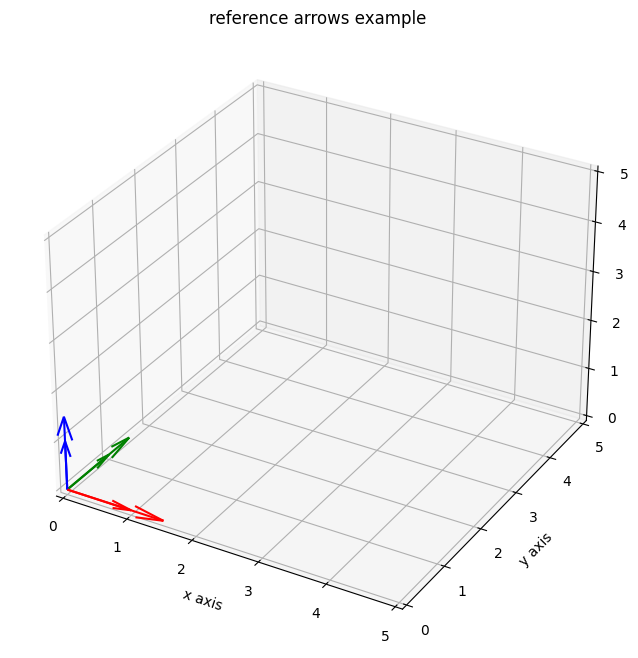

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d
from math import pi,cos,sin


#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a 4x3 matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)
    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis

def set_plots(ax=None,figure = None,figsize=(15,8),lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        #ax=[]
        new_axis = True
    else:
        new_axis=False

    if new_axis:
        ax = figure.add_subplot(1,1,1,projection='3d')

    ax.set_title("reference arrows example")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax


def move (dx,dy,dz):
    T = np.eye(4)
    T[0,-1] = dx
    T[1,-1] = dy
    T[2,-1] = dz
    return T

from math import pi,cos,sin

def z_rotation(angle):
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

def x_rotation(angle):
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    return rotation_matrix


### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)


# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))


#origin point
point =np.array([[0],[0],[0],[1]])


# You can also consider the camera as an object composed by its base and origin
# Then you can transform such object whenever you want to rotate or translate the camera
cam  = np.hstack([base,point])



print('Camera base. The columns are the axes X, Y and Z')
print(base)
print('Origin')
print(point)

print('Camera Frame (object) with the 3 axes and the origin as the last column')
print(cam)


# World reference frame plotted at the origin
axis = set_plots(lim=[0,5])
axis = draw_arrows(point,base,axis)
axis = draw_arrows(cam[:,3],cam[:,0:3],axis,length=1.0)


Cameras
CAM01 after translation:
 [[1. 0. 0. 1.]
 [0. 1. 0. 3.]
 [0. 0. 1. 4.]
 [0. 0. 0. 1.]]
CAM02 after the first rotation around Z:
 [[ 0.707 -0.707  0.    -1.414]
 [ 0.707  0.707  0.     2.828]
 [ 0.     0.     1.     4.   ]
 [ 0.     0.     0.     1.   ]]
CAM03 after the second rotation around Z:
 [[ 0. -1.  0. -3.]
 [ 1.  0.  0.  1.]
 [ 0.  0.  1.  4.]
 [ 0.  0.  0.  1.]]
CAM04 after the first rotation around Y:
 [[ 0.    -0.707  0.707  0.707]
 [ 1.     0.     0.     1.   ]
 [-0.     0.707  0.707  4.95 ]
 [ 0.     0.     0.     1.   ]]
CAM05 after the second rotation around Y:
 [[ 0. -0.  1.  4.]
 [ 1.  0.  0.  1.]
 [-0.  1.  0.  3.]
 [ 0.  0.  0.  1.]]


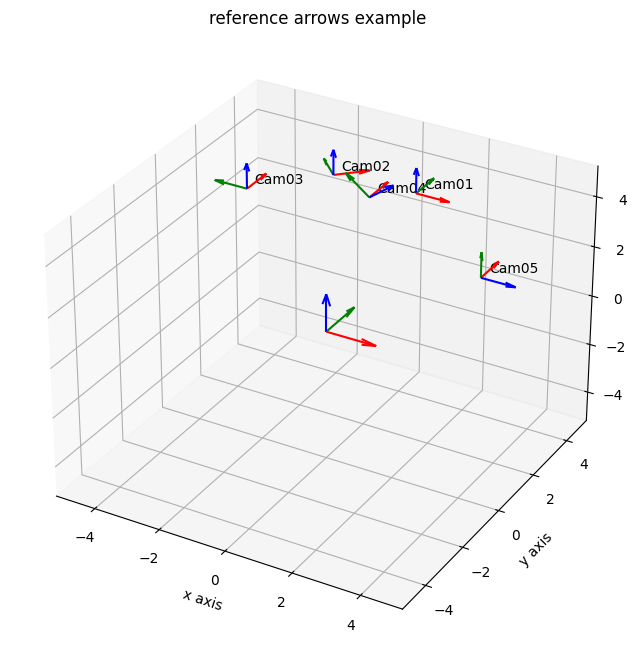

In [ ]:

#Translate the camera frame
T1 = move (1,3,4)
cam01 = np.dot(T1,cam)

#Rotate the camera frame twice around the Z-axis
R1 = z_rotation(pi/4)

cam02 = np.dot(R1,cam01)
cam03 = np.dot(R1,cam02)

#Rotate the camera frame twice around the Y-axis
R2 = y_rotation(pi/4)

cam04 = np.dot(R2,cam03)

cam05 = np.dot(R2,cam04)


print('Cameras')
print('CAM01 after translation:\n', cam01)
print('CAM02 after the first rotation around Z:\n',cam02)
print('CAM03 after the second rotation around Z:\n',cam03)
print('CAM04 after the first rotation around Y:\n', cam04)
print('CAM05 after the second rotation around Y:\n', cam05)


# World reference frame plotted at the origin
axis1 = set_plots(lim=[-5,5])
axis1 = draw_arrows(point,base,axis1)



# Plot all the transformations for comparison
axis1 = draw_arrows(cam01[:,3],cam01[:,0:3],axis1,length=1.0)
axis1.text(cam01[0,3]+.15,cam01[1,3]+.15,cam01[2,3]+.15, "Cam01")
axis1 = draw_arrows(cam02[:,3],cam02[:,0:3],axis1,length=1.0)
axis1.text(cam02[0,3]+.15, cam02[1,3]+.15,cam02[2,3]+.15, "Cam02")
axis1 = draw_arrows(cam03[:,3],cam03[:,0:3],axis1,length=1.0)
axis1.text(cam03[0,3]+.15, cam03[1,3]+.15,cam03[2,3]+.15, "Cam03")
axis1 = draw_arrows(cam04[:,3],cam04[:,0:3],axis1,length=1.0)
axis1.text(cam04[0,3]+.15, cam04[1,3]+.15,cam04[2,3]+.15, "Cam04")
axis1 = draw_arrows(cam05[:,3],cam05[:,0:3],axis1,length=1.0)
axis1.text(cam05[0,3]+.15,cam05[1,3]+.15,cam05[2,3]+.15, "Cam05")

# Show the plots
plt.show()